In [1]:
%load_ext autoreload
%matplotlib inline
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
import sys
import pickle
import h5py
from sklearn.metrics import mean_squared_error

In [3]:
#sys.path.append("../..")
sys.path.append("..")

from WatChMaL.analysis.multi_plot_utils import multi_disp_learn_hist, multi_compute_roc, multi_plot_roc
from WatChMaL.analysis.comparison_utils import multi_get_masked_data, multi_collapse_test_output
from WatChMaL.analysis.performance_analysis_utils import remove_indices
from WatChMaL.analysis.performance_analysis_plot_utils import plot_fitqun_binned_performance, plot_momentum_binned_performance
from WatChMaL.analysis.performance_analysis_plot_utils import plot_true_momentum_binned_performance, plot_to_wall_binned_performance, plot_energy_binned_performance, plot_zenith_binned_performance, plot_azimuth_binned_performance
from WatChMaL.analysis.performance_analysis_plot_utils import plot_to_wall_binned_in_energy, plot_zenith_binned_in_azimuth, plot_azimuth_binned_in_zenith

In [15]:
############# define plotting params #############
c = plt.rcParams['axes.prop_cycle'].by_key()['color']
label_dict = {"$\gamma$":0, "$e$":1, "$\mu$":2, "$\pi^0$": 3}
inverse_label_dict = {0:"$\gamma$", 1:"$e$", 2:"$\mu$", 3: "$\pi^0$"}
dim_dict = {"x":0, "y":1, "z":2}

# Some checks of the pointnet outputs

In [107]:
pointnet_reg_loc = [#'/project/rpp-blairt2k/jgao/WatChMaL/outputs/2023-01-11/11-04-33/outputs'] # e position recon
#                     '/project/rpp-blairt2k/jgao/WatChMaL/outputs/2023-01-25/09-42-31/outputs'] # mu position recon
#                     '/project/rpp-blairt2k/jgao/WatChMaL/outputs/2023-01-25/11-45-08/outputs'] # pi0 position recon
                    '/project/rpp-blairt2k/jgao/WatChMaL/outputs/2023-01-25/15-15-36/outputs'] # g position recon

regression_target             = [np.load(loc + "/targets.npy") for loc in pointnet_reg_loc]
regression_prediction         = [np.load(loc + "/predictions.npy") for loc in pointnet_reg_loc]

dim = "z"
particle = 2

### Plot Recon vs True Values

In [108]:
# Calculate residual
residual = regression_target[0][:,dim_dict[dim]] - regression_prediction[0][:,dim_dict[dim]]

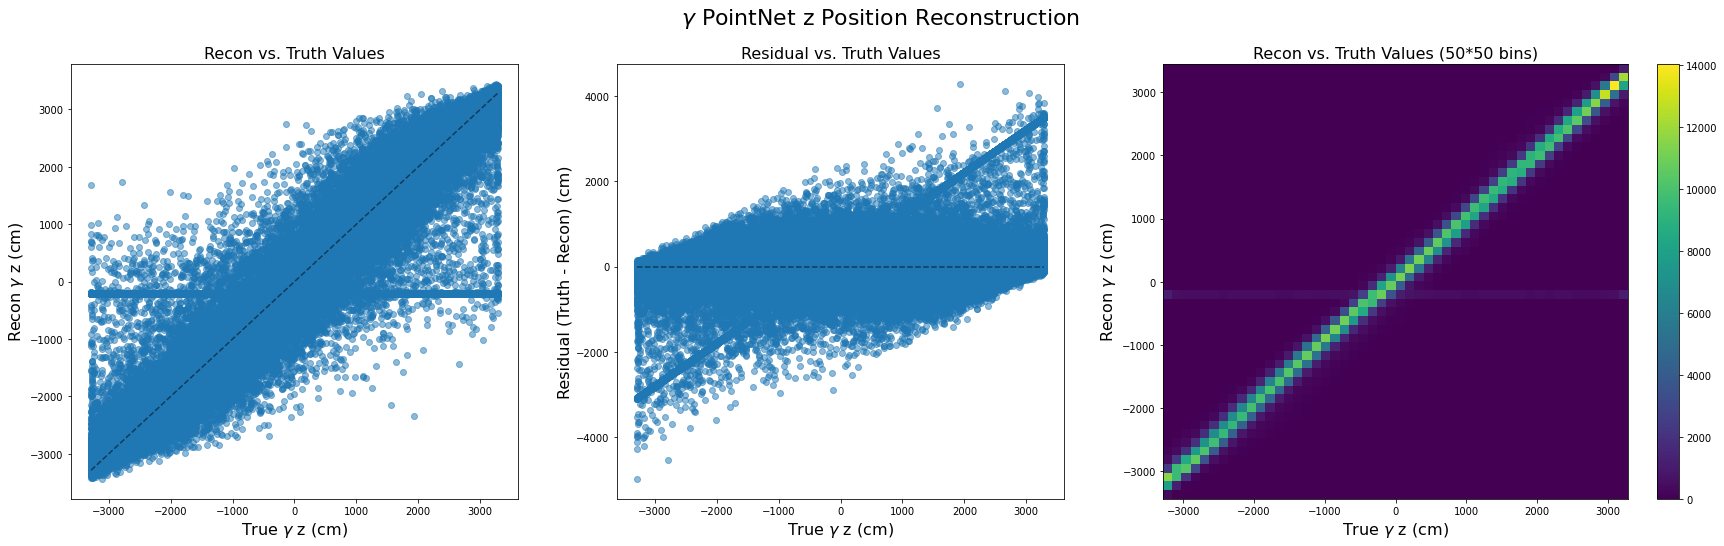

In [109]:
min_val = min(regression_target[0][:,dim_dict[dim]])
max_val = max(regression_target[0][:,dim_dict[dim]])
ref_x = [min_val, max_val]
ref_y = [min_val, max_val]

fig, axs = plt.subplots(1, 3, figsize=(30, 8), gridspec_kw={'width_ratios': [1, 1, 1.3]})
axs[0].plot(regression_target[0][:,dim_dict[dim]], regression_prediction[0][:,dim_dict[dim]], "o", alpha=0.5)
axs[0].plot(ref_x, ref_y, '--', color='black', alpha=0.5)
axs[1].plot(regression_target[0][:,dim_dict[dim]], residual, "o", alpha=0.5)
axs[1].plot(ref_x, [0, 0], '--', color='black', alpha=0.5)
h = axs[2].hist2d(regression_target[0][:,dim_dict[dim]], regression_prediction[0][:,dim_dict[dim]], bins=(50,50))
plt.colorbar(h[3])

axs[0].set_title("Recon vs. Truth Values", fontsize=16)
axs[0].set_xlabel("True $\gamma$ %c (cm)" %dim, fontsize=16)
axs[0].set_ylabel("Recon $\gamma$ %c (cm)" %dim, fontsize=16)
axs[1].set_title("Residual vs. Truth Values", fontsize=16)
axs[1].set_xlabel("True $\gamma$ %c (cm)" %dim, fontsize=16)
axs[1].set_ylabel("Residual (Truth - Recon) (cm)", fontsize=16)
axs[2].set_title("Recon vs. Truth Values (50*50 bins)", fontsize=16)
axs[2].set_xlabel("True $\gamma$ %c (cm)" %dim, fontsize=16)
axs[2].set_ylabel("Recon $\gamma$ %c (cm)" %dim, fontsize=16)
fig.suptitle("$\gamma$ PointNet %c Position Reconstruction" %dim, fontsize=22)
plt.savefig("pos_recon_analysis_plots/gamma_%c_position_recon.png" %dim)
# axs[1].set_ylim([-50, 0])

In [110]:
# Calculate RMS
RMS = mean_squared_error(regression_target[0][:,dim_dict[dim]], regression_prediction[0][:,dim_dict[dim]], squared=False)
print(RMS)

329.4909796003037


In [10]:
print(regression_target[0][412760], regression_prediction[0][412760])

[ 8.49723816e-03 -2.89339038e+03  2.95150261e+01] [ -298.77062988 -3032.75854492   143.64529419]


In [8]:
sq_err = (regression_target[0][:,2]**2 - regression_prediction[0][:,2]**2)
print(np.where(sq_err >5000))
fig, ax = plt.subplots(1,1, figsize=(16, 8))
ax.plot(sq_err)
ax.set_xlabel("Event No.")
ax.set_ylabel("Absolute Percentage Difference wrt True Position")
ax.set_ylim([0,1000])

(array([      0,       1,       2, ..., 1199996, 1199997, 1199999]),)


(0.0, 1000.0)

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x2ba22ca28b80> (for post_execute):


OverflowError: Exceeded cell block limit in Agg.  Please set the value of rcParams['agg.path.chunksize'], (currently 0) to be greater than 100 or increase the path simplification threshold(rcParams['path.simplify_threshold'] = 0.111111111111 by default and path.simplify_threshold = 0.111111111111 on the input).

OverflowError: Exceeded cell block limit in Agg.  Please set the value of rcParams['agg.path.chunksize'], (currently 0) to be greater than 100 or increase the path simplification threshold(rcParams['path.simplify_threshold'] = 0.111111111111 by default and path.simplify_threshold = 0.111111111111 on the input).

<Figure size 1152x576 with 1 Axes>

In [57]:
np.where(regression_target[0][:,0]==0)

(array([889065]),)

In [59]:
# print(regression_target[0][:10][:,0], regression_prediction[0][:10][:,0])
print(regression_target[0][889065], regression_prediction[0][889065])
print("subtract", regression_target[0][:10][:,0] - regression_prediction[0][:10][:,0])
print("percentage", abs((regression_target[0][:10][:,0] - regression_prediction[0][:10][:,0]) / regression_prediction[0][:10][:,0] ))

[    0.          1727.60791016 -2979.20385742] [ -182.79084778  1778.58679199 -3126.1315918 ]
subtract [ 2.09298615e+02  1.83391953e+02 -2.59735107e+01  2.92442200e+02
  3.16284180e-01 -9.06982422e-02  1.34861694e+02 -3.17142944e+01
  4.47118652e+02  1.75097290e+02]
percentage [3.89582156e-01 2.10239865e+00 1.47240790e-02 4.78684799e-01
 2.54386898e-04 5.69840031e-05 1.61038900e-01 3.27978092e-02
 2.94655719e-01 1.93220706e-01]


/tmp/ipykernel_22391/822545790.py:2: RuntimeWarning: divide by zero encountered in true_divide
  percentage_off_x = abs((regression_target[0][:,0] - regression_prediction[0][:,0]) / regression_target[0][:,0])


[6.38222097e-01 1.90711287e+00 1.49441173e-02 ... 6.95396851e-02
 2.39530275e+02 2.53273492e-01]
0.9921302861851589


(array([1.193078e+06, 3.512000e+03, 1.134000e+03, ..., 0.000000e+00,
        0.000000e+00, 1.000000e+00]),
 array([1.21174917e-07, 1.35660452e+01, 2.71320904e+01, ...,
        6.78030935e+04, 6.78166595e+04, 6.78302256e+04]),
 <BarContainer object of 5000 artists>)

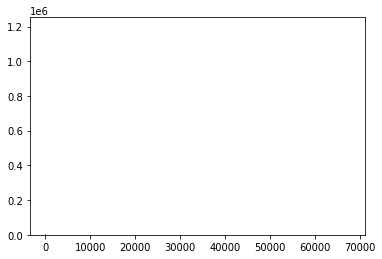

In [120]:
# Method not working
percentage_off_x = abs((regression_target[0][:,0] - regression_prediction[0][:,0]) / regression_target[0][:,0])
print(percentage_off_x)
percentage_off_x = np.delete(percentage_off_x, 889065)
print(np.mean(percentage_off_x))
plt.hist(percentage_off_x, bins=5000)
# plt.xscale('log')

ValueError: too many values to unpack (expected 2)

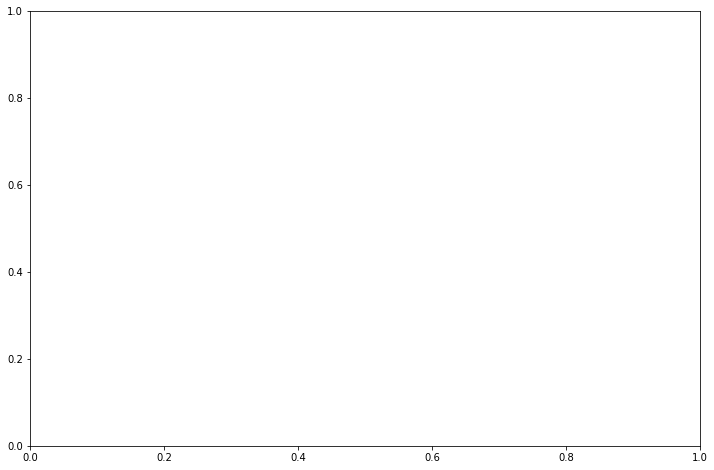

--- Logging error ---
Traceback (most recent call last):
  File "/opt/conda/lib/python3.8/site-packages/ipykernel/kernelbase.py", line 461, in dispatch_queue
    await self.process_one()
  File "/opt/conda/lib/python3.8/site-packages/ipykernel/kernelbase.py", line 450, in process_one
    await dispatch(*args)
TypeError: object NoneType can't be used in 'await' expression

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/opt/conda/lib/python3.8/logging/__init__.py", line 1089, in emit
    self.flush()
  File "/opt/conda/lib/python3.8/logging/__init__.py", line 1069, in flush
    self.stream.flush()
BrokenPipeError: [Errno 32] Broken pipe
Call stack:
  File "/opt/conda/lib/python3.8/runpy.py", line 194, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/opt/conda/lib/python3.8/runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "/opt/conda/lib/python3.8/site-packages/ipykernel_laun

In [72]:
def plot_recon_vs_true(true_val, recon_val, hist_range_low=-3500, hist_range_high=3500, 
                       hist_bin_width=500, title="", x_label="True x Position", y_label="Recon x Position"):
    """
    Plotting electron efficiency vs true kinematic for given kinematic variable

    Parameters
    ----------
    true_val : array_like
        Array of the truth information, typically of the size (1200000,1)
    recon_val : array_like
        Array of the reconstructed kinematic, typically of the size (1200000,1)
    hist_range_low : float, default: -3500.
        The lower bound of the histogram plot (one edge of the detector)
    hist_range_high : float, default: 3500.
        The upper bound of the histogram plot (the other edge of the detector)
    hist_bin_width : float, default: 500.
        The width of each histogram bin
    title : string, default: empty
        The title of the plot
    x_label : string, default: empty
        The title of the x-axis
    y_label : string, default: "Electron Efficiency"
        The title of the y-axis
    """
    # define the bins for the plot
    plot_bin_low = hist_range_low
    plot_bin_high = hist_range_high
    plot_bin_width = hist_bin_width
    plot_bin_lows = np.arange(plot_bin_low, plot_bin_high, plot_bin_width)
    plot_bin_centres = np.arange(plot_bin_low + plot_bin_width/2, plot_bin_high, plot_bin_width)
    plot_bin_halfwidths = np.full_like(plot_bin_centres, plot_bin_width/2)

    # for each particle, each bin, find the events in that bin
    plot_bin_selections = [ (true_val > l) & (true_val <= l+plot_bin_width) for l in plot_bin_lows ]

    # for each event, for each bin, calculate the accuracy

    fq_eff_binned = np.array([np.mean(fq_e_tp[c]) for c in plot_bin_selections])
    fq_eff_binned_err = np.sqrt(fq_eff_binned*(1-fq_eff_binned)/np.sum(plot_bin_selections, axis=1))
    # for PointNet
    pointnet_eff_binned = np.array([np.mean(pn_e_tp[c]) for c in plot_bin_selections])
    pointnet_eff_binned_err = np.sqrt(pointnet_eff_binned*(1-pointnet_eff_binned)/np.sum(plot_bin_selections, axis=1))

    # plot the results
    fig, ax = plt.subplots(figsize=(20,15))
    ax.errorbar(plot_bin_centres, fq_eff_binned, yerr=fq_eff_binned_err, xerr=plot_bin_halfwidths,
                label='fiTQun', fmt='-o', capsize=5)
    ax.errorbar(plot_bin_centres, pointnet_eff_binned, yerr=pointnet_eff_binned_err, xerr=plot_bin_halfwidths,
                label='PointNet', fmt='-o', capsize=5)
    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.legend()
    fig.tight_layout()